<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Data_Visualization/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go

In [33]:
data = pd.read_csv('/content/drive/MyDrive/python_OP/Clean_Dataset.csv')

In [34]:
data.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
397919    541904
397920    541905
397921    541906
397922    541907
397923    541908
Name: Unnamed: 0, Length: 397924, dtype: int64

In [35]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Month,Year,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12/1/2010,8:26,8,12,2010,20.34


In [36]:
moving_column= data.pop("TotalCost")
data.insert(6,"TotalCost", moving_column)


In [37]:
moving_column= data.pop("InvoiceDate")
data.insert(7,"InvoiceDate", moving_column)

# **Khách hàng VIP**

In [38]:
quan_stock = data.groupby("CustomerID").count()["InvoiceNo"]
quan_stock= quan_stock.sort_values()
quan_stock_top= quan_stock.nlargest(30)
quan_stock_top

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
14646.0    2080
13089.0    1818
13263.0    1677
14298.0    1637
15039.0    1502
14156.0    1400
18118.0    1279
14159.0    1204
14796.0    1141
16033.0    1137
15005.0    1119
14056.0    1106
14769.0    1090
13081.0    1028
16549.0     981
14527.0     972
14456.0     970
17511.0     963
15719.0     937
15555.0     899
16931.0     898
17811.0     851
14505.0     799
18283.0     756
Name: InvoiceNo, dtype: int64

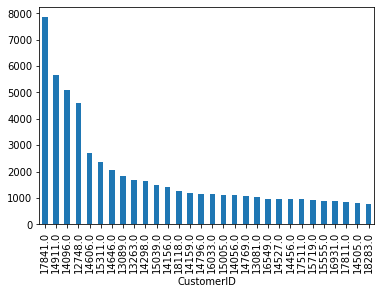

In [39]:
quan_stock_top.plot.bar()
plt.show()

# **Tháng có doanh số cao nhất?**

In [40]:
gr_month= data.groupby("Month").sum()["TotalCost"]
gr_month

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalCost, dtype: float64

In [41]:
gr_month.max()

1161817.3799999433

Trực quan totalCost theo month

Text(0, 0.5, 'TotalCost')

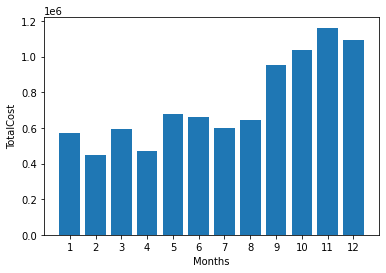

In [42]:
months = range(1,13)
plt.bar(months, gr_month, align='center')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("TotalCost")

#**Country nào có doanh số cao nhất** 

In [43]:
gr_country = data.groupby("Country").sum()["TotalCost"]
gr_country.max()
country = [country for country, totalcost in gr_country.items()]

In [44]:
df= data
df = go.Bar(x = country, y = gr_country,marker={'color': gr_country,'colorscale': 'Viridis'})
layout = go.Layout(title = 'Country')
fig = go.Figure(data=df , layout = layout)
fig.show()

# **Doanh nghiệp nên quảng cáo vào khung giờ nào để tăng doanh thu?**

In [45]:
gr_hour = data.groupby("Hour").count()["TotalCost"]
gr_hour.max()
hour = [hour for hour, totalcost in gr_hour.items()]


Text(0, 0.5, 'TotalCost')

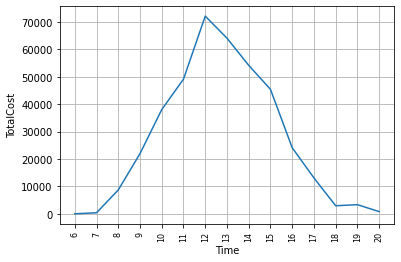

In [46]:
plt.plot(hour, gr_hour)
plt.grid()
plt.xticks(hour, rotation = 90, size=8)
plt.xlabel("Time")
plt.ylabel("TotalCost")


# **Các sản phẩm nào thường được khách hàng mua kèm với nhau**

In [47]:
data_dup = data[data["InvoiceNo"].duplicated(keep= False)]
data_dup.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalCost,CustomerID,InvoiceDate,Country,Date,Time,Hour,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,12/1/2010 8:26,United Kingdom,12/1/2010,8:26,8,12,2010


In [48]:
gr_product = lambda product: ','.join(product) 
data_dup["All_Products"]= data_dup.groupby("InvoiceNo")["StockCode"].transform(gr_product)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data_combo= data_dup[["InvoiceNo","All_Products"]].drop_duplicates()
data_combo.shape

(17144, 2)

In [50]:
data_combo["All_Products"].value_counts()

22632,22633                                                                                                                                                                           15
85123A,21733                                                                                                                                                                           5
23552,23498                                                                                                                                                                            4
21137,22041                                                                                                                                                                            4
22379,22385,21931,85099B                                                                                                                                                               4
                                                                           

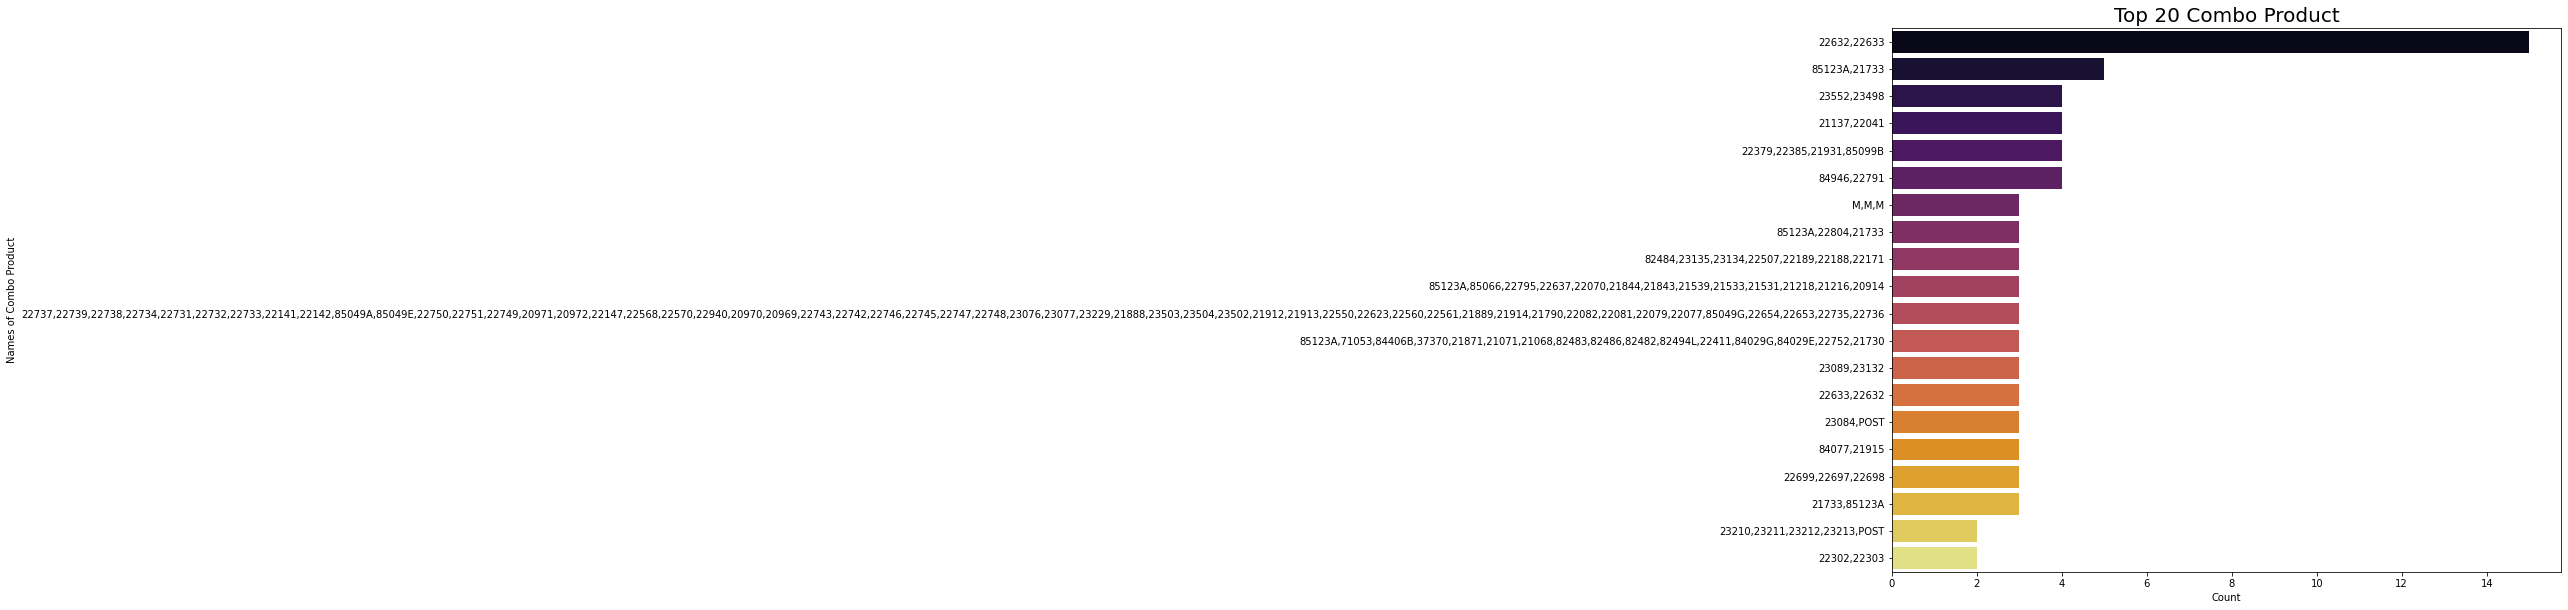

In [51]:
plt.rcParams['figure.figsize'] = (12, 10)
a = data_combo["All_Products"].value_counts().head(20)
sns.barplot(x = a.values, y = a.index, palette = 'inferno')
plt.title('Top 20 Combo Product', fontsize = 20)
plt.ylabel('Names of Combo Product')
plt.xlabel('Count')
plt.show()

In [52]:
data_arr= np.array(data_dup[["StockCode","Description"]])
data_arr
b=[]
for i in data_arr:
  if i[0] == "22632" or i[0]=="22633" :
    if i[1] not in b:
      b.append(i[1])
for i in b:
  print(i)

HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
HAND WARMER RED RETROSPOT


# **Sản phẩm nào bán chạy nhất và tại sao?**

In [53]:
all_products_pri =  data.groupby("StockCode").mean()["UnitPrice"]
all_products_pri.shape

(3665,)

In [54]:
all_products= data.groupby("StockCode").sum()['Quantity']
all_products



StockCode
10002      823
10080      291
10120      193
10123C       5
10124A      16
          ... 
C2         134
DOT         16
M         7179
PADS         4
POST      3120
Name: Quantity, Length: 3665, dtype: int64

In [55]:
product_ls = [StockCode for StockCode, Quantity in all_products.items()]
quan_ls = [int(Quantity) for StockCode, Quantity in all_products.items()]
price_ls = [UnitPrice for StockCode, UnitPrice in all_products_pri.items()]

arr_quan_pro=[]
arr_quan_pro.append(quan_ls)
arr_quan_pro.append(product_ls)
arr_quan_pro.append(price_ls)
all_products.shape

(3665,)

In [56]:
ind = np.argpartition(arr_quan_pro[0], -10)[-10:]
print(ind[1])
print( "Mã sản phẩm", " | ", "Số lượng đã bán", " |   Giá")
x=y1=y2=[]
for i in ind:
  x.append(arr_quan_pro[1][i])
  y1.append(int(arr_quan_pro[0][i]))
  y2.append(arr_quan_pro[2][i])
  print(arr_quan_pro[1][i], " : \t", arr_quan_pro[0][i], " :      \t",arr_quan_pro[2][i])

1919
Mã sản phẩm  |  Số lượng đã bán  |   Giá
22492  : 	 26076  :      	 0.6565230769230804
23084  : 	 27202  :      	 2.0139429928740933
21212  : 	 33693  :      	 0.5482116104868929
84879  : 	 35362  :      	 1.6807954545454948
85123A  : 	 36782  :      	 2.89310565110558
84077  : 	 54415  :      	 0.29260042283298265
23843  : 	 80995  :      	 2.08
85099B  : 	 46181  :      	 2.015877626699588
22197  : 	 49183  :      	 0.8392883895131239
23166  : 	 77916  :      	 1.22030303030303


In [57]:
top_10_pro= all_products.sort_values()[3600:]
top_10_pro[-1]

80995

In [58]:
pro_ls =  [StockCode for StockCode, Quantity in top_10_pro.items()]
pro_ls[-1]

'23843'

In [59]:
def Average(lst):
    return sum(lst) / len(lst)

In [60]:
avg_price=[]
for i in pro_ls:
  temp=[]
  for j in range(len(data["StockCode"])):
    if i == data["StockCode"][j]:
      temp.append(data["UnitPrice"][j])
  avg_price.append(Average(temp))
  


In [61]:
avg_price[-2]

1.22030303030303

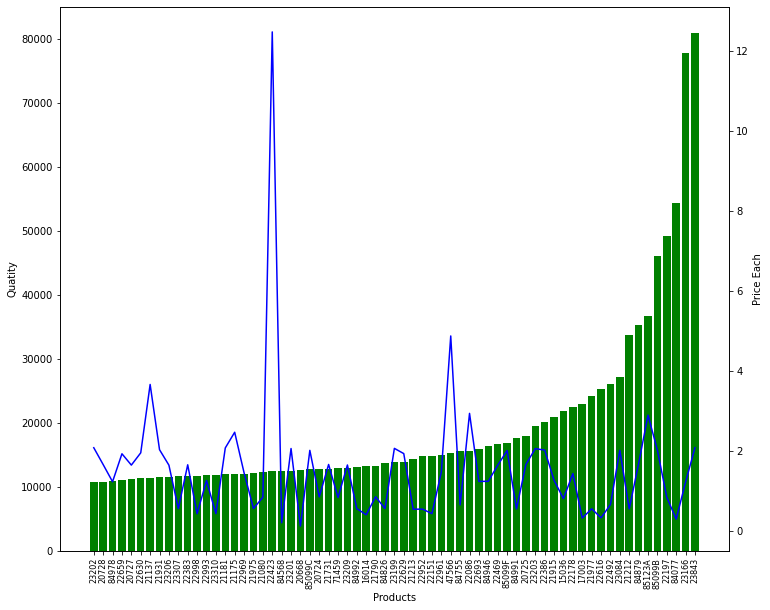

In [62]:
x= pro_ls
y1= top_10_pro
y2= avg_price
fig, ax1 = plt.subplots()
ax2= ax1.twinx()
ax1.bar(x, y1, color = "g")
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(pro_ls, rotation=90, size=8)
ax1.set_xlabel("Products")
ax1.set_ylabel("Quatity")
ax2.set_ylabel("Price Each")
plt.show()

In [63]:
for i in range(len(data["StockCode"])):
  if data["StockCode"][i] == '23843' :
    print(data["Description"][i])



PAPER CRAFT , LITTLE BIRDIE


#Tìm độ chêch lệch trên trục dữ liệu
Thống kê trong 1 ngày, tần số (Frequency) và lần mua gần nhất số lượng bao nhiêu (Recency) và số tiền thu nhập (Monetary) theo khách hàng.

In [68]:
RFM_data = pd.read_csv('/content/drive/MyDrive/python_OP/RMF_data.csv')
RFM_data.pop('Unnamed: 0')
RFM_data.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
0,12347.0,2,182,4310.00,1,1,1,111,3,True Lover
1,12348.0,75,31,1797.24,3,3,1,331,7,Flirting
2,12349.0,18,73,1757.55,2,2,1,221,5,True Lover
3,12350.0,310,17,334.40,4,4,3,443,11,Platonic Friend
4,12352.0,36,85,2506.04,2,2,1,221,5,True Lover


In [69]:
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Monetary V/s Recency
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()